Import the required packages with their customary aliases:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Check file path for importing gdp_percapita.csv

In [2]:
os.getcwd()

'C:\\Users\\user\\workspace\\c11\\Python\\Notebooks\\gdp-and-internet-usage-Chris-Swann'

In [3]:
os.listdir("../../data/")

['gdp_percapita.csv',
 'internet_use.csv',
 'penguins.csv',
 'people.csv',
 'schools_clean.csv',
 'schools_with_scores.csv',
 'school_indicator_scores_suppressed.csv']

Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df.

In [4]:
gdp_df = pd.read_csv('../../data/gdp_percapita.csv')

In [5]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


How many rows and columns are in gdp_df? What are the data types of each colum

In [6]:
gdp_df.shape

(8219, 4)

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [9]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [10]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [11]:
type_counts = gdp_df.Country.value_counts()

In [12]:
type(type_counts)

pandas.core.series.Series

In [13]:
type_counts = type_counts.to_frame()

In [14]:
type_counts

,count
Country,
Africa Eastern and Southern,34
Africa Western and Central,34
Albania,34
Andorra,34
Algeria,34
...,...
Faroe Islands,16
Kosovo,16
Sint Maarten (Dutch part),15


In [15]:
type_counts = type_counts.reset_index(drop=True)
type_counts

,count
0,34
1,34
2,34
3,34
4,34
...,...
242,16
243,16
244,15
245,13


In [16]:
type_counts.sort_values(by='count')

,count
246,11
245,13
244,15
243,16
242,16
...,...
205,34
224,34
227,34
226,34


In [17]:
gdp_df.isnull().sum()

Country           0
Year              0
GDP_Per_Capita    0
dtype: int64

In [18]:
total_years = gdp_df['Year'].nunique()

In [19]:
years_per_country = gdp_df.groupby('Country')['Year'].nunique()
years_per_country

Country
Afghanistan                    24
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
                               ..
Virgin Islands                 21
West Bank and Gaza             30
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 247, dtype: int64

In [20]:
complete_countries = years_per_country[years_per_country == total_years]

In [21]:
len(complete_countries)

228

In [22]:
complete_countries.index.tolist()

['Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Caribbean small states',
 'Central African Republic',
 'Central Europe and the Baltics',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czechia',
 "CÃ´te d'Ivoire",
 'Dem. Rep. Congo',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD)',
 'East Asia & Pacific (excluding high income)',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Esw

In [23]:
missing_years = total_years - years_per_country
missing_years

Country
Afghanistan                    10
Africa Eastern and Southern     0
Africa Western and Central      0
Albania                         0
Algeria                         0
                               ..
Virgin Islands                 13
West Bank and Gaza              4
World                           0
Zambia                          0
Zimbabwe                        0
Name: Year, Length: 247, dtype: int64

In [24]:
countries_missing_many = missing_years.sort_values(ascending = False)

In [25]:
countries_missing_many.head(10)

Country
Djibouti                     23
Turks and Caicos Islands     21
Sint Maarten (Dutch part)    19
Kosovo                       18
Faroe Islands                18
Cayman Islands               16
Virgin Islands               13
CuraÃ§ao                     10
Afghanistan                  10
San Marino                    8
Name: Year, dtype: int64

In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [26]:
gdp_2020 = gdp_df[gdp_df["Year"] == 2020]
gdp_2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

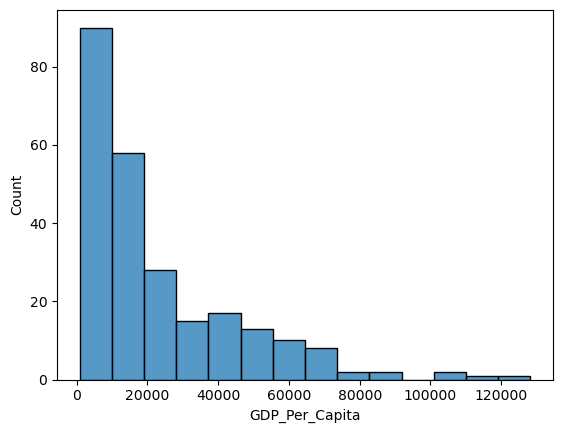

In [27]:
sns.histplot(data = gdp_2020, x = 'GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

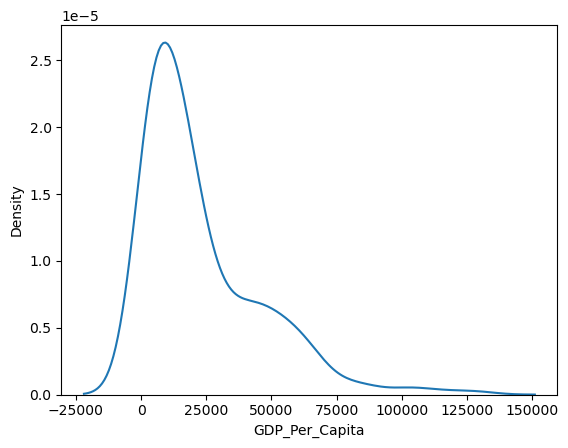

In [28]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a77797b890>,
 'caps': [<matplotlib.lines.Line2D at 0x1a77797bb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a77797b750>],
 'medians': [<matplotlib.lines.Line2D at 0x1a77797bd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a77797bed0>],
 'means': []}

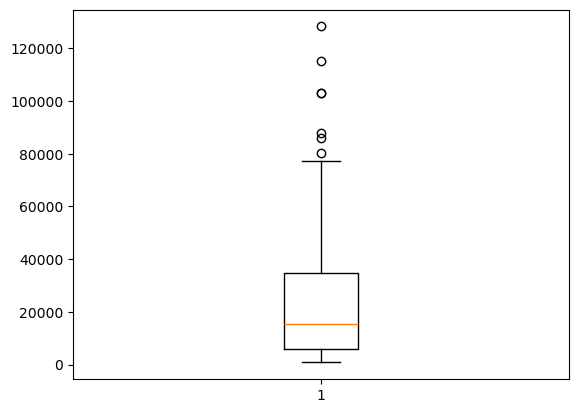

In [29]:
plt.boxplot(gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

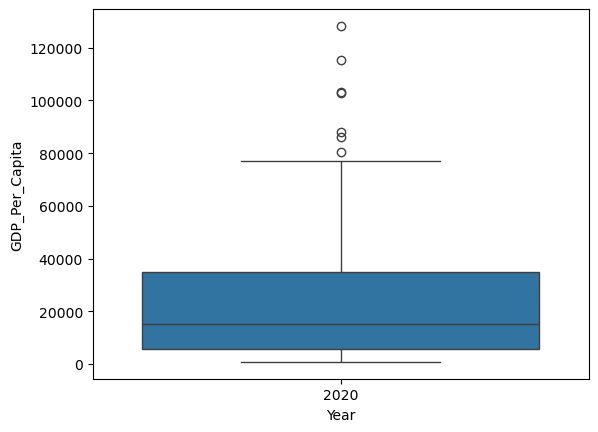

In [30]:
sns.boxplot(x = gdp_2020['Year'], y = gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

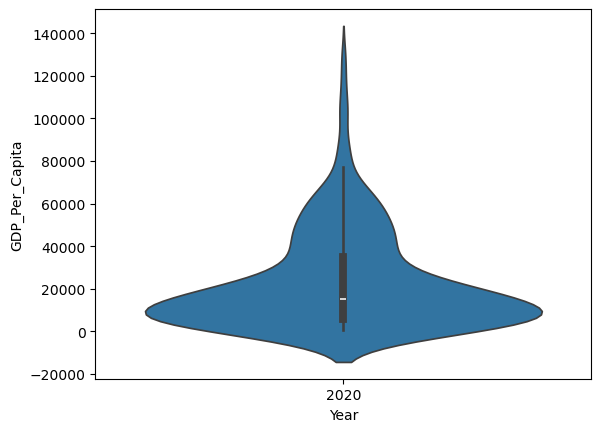

In [31]:
sns.violinplot(x=gdp_2020['Year'], y=gdp_2020['GDP_Per_Capita'])

What was the median GDP per capita value in 2020?

In [32]:
round(gdp_2020['GDP_Per_Capita'].median(),2)

15309.24

For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. 

In [33]:
gdp_decades = gdp_df[gdp_df["Year"].isin([1990, 2000, 2010, 2020])]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

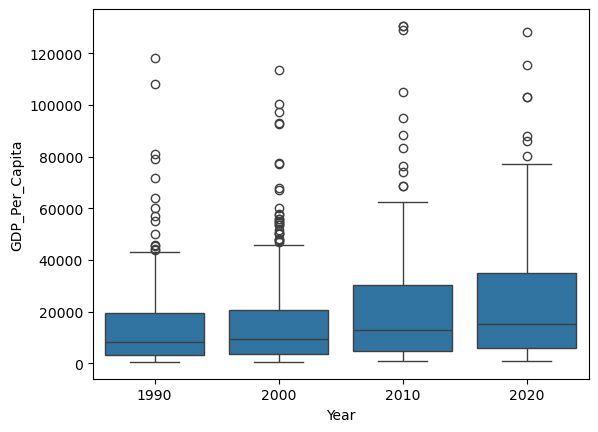

In [34]:
sns.boxplot(x="Year", y="GDP_Per_Capita", data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

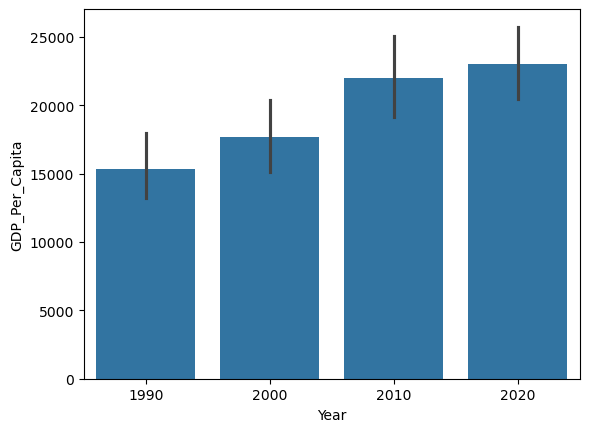

In [35]:
sns.barplot(data=gdp_decades, x = 'Year', y = 'GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

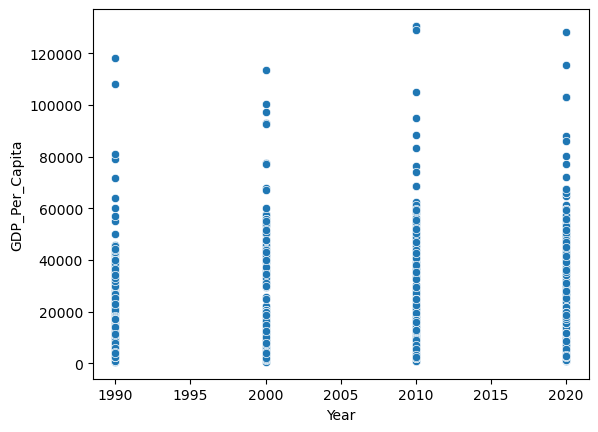

In [36]:
sns.scatterplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

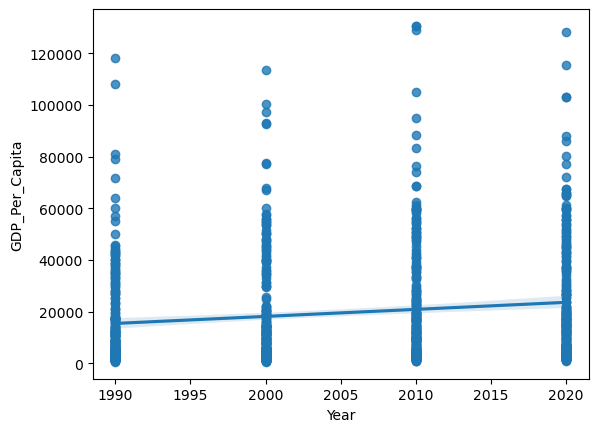

In [37]:
sns.regplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')

Which country was the first to have a GDP per capita greater than $100,000?

In [38]:
gdp_sort_year = gdp_df.sort_values('Year')
gdp_sort_year

,Country,Year,GDP_Per_Capita
8218,Zimbabwe,1990,4013.299059
4320,Lithuania,1990,20567.668111
91,Africa Western and Central,1990,3299.401375
6898,Sri Lanka,1990,4561.579133
1366,Central Europe and the Baltics,1990,17277.843840
...,...,...,...
1299,Central African Republic,2023,1135.136277
5001,Moldova,2023,15855.273742
1179,Cameroon,2023,4870.570765
24,Africa Eastern and Southern,2023,3967.860937


In [39]:
gdp_100k = gdp_sort_year[gdp_sort_year['GDP_Per_Capita'] > 100000]

In [40]:
gdp_100k

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
972,Brunei,1992,111457.220910
...,...,...,...
3490,Ireland,2023,115401.125283
6116,Qatar,2023,116159.142559
6511,Singapore,2023,127543.554752
4457,"Macao SAR, China",2023,104961.643485


In [41]:
#reset index for rank

gdp_100k = gdp_100k.reset_index(drop = True)
gdp_100k.loc[0]

Country                  Brunei
Year                       1990
GDP_Per_Capita    118163.683198
Name: 0, dtype: object

Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [42]:
# this code returns the max value as float 

max_2020 = gdp_2020['GDP_Per_Capita'].max()
max_2020

128256.5603407562

In [43]:
type(max_2020)

float

In [44]:
# this code returns country, year, and gdp_per_capita for max value as a dataframe

max_2020_gdp = gdp_2020[gdp_2020['GDP_Per_Capita'] == max_2020]
max_2020_gdp

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


In [45]:
type(max_2020_gdp)

pandas.core.frame.DataFrame

In [46]:
# this is an unnecessary step but could be used for clarification if someone else is reading the code
# to be used in the code below for plotting the line graph

top_country = gdp_df[gdp_df['Year'] == 2020].nlargest(1, 'GDP_Per_Capita')['Country'].tolist()[0]
top_country

'Luxembourg'

<Axes: xlabel='Year'>

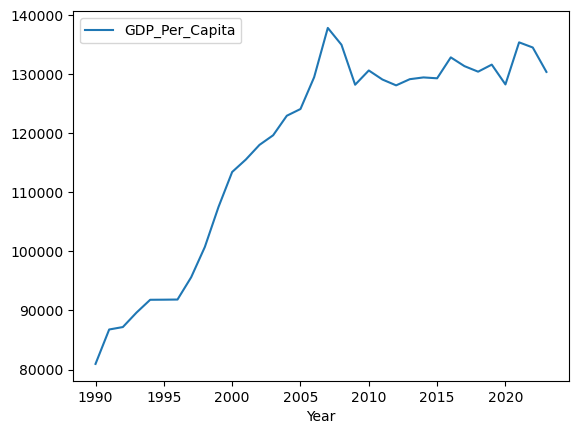

In [47]:
# can either input top_country or Luxembourg 

gdp_df[gdp_df['Country'] == 'Luxembourg'].plot(x='Year', y='GDP_Per_Capita')

Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [48]:
internet_df = pd.read_csv('../../data/internet_use.csv', nrows = 6084)

In [49]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [50]:
internet_df = internet_df.drop(columns = 'Value Footnotes')
internet_df

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739
6082,Zimbabwe,1990,0.000000


In [51]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739
6082,Zimbabwe,1990,0.000000


Look at the number of observations in this dataset per year. What do you notice?

In [52]:
# value_counts

internet_df.value_counts('Year').head(10)

Year
1990    226
2007    217
2002    214
2011    214
2009    214
2008    214
2006    212
2005    212
2001    212
2000    210
Name: count, dtype: int64

What is the first year to have a non-zero internet users percentage value?

In [53]:
non_zero_int = internet_df[internet_df['Internet_Users_Pct'] > 0]
non_zero_int

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6077,Zimbabwe,1998,0.081648
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684


In [54]:
non_zero_int.sort_values('Year').iloc[0]['Year']

'1990'

How does the distribution of internet users percent differ for 2000 and 2014?

In [55]:
int_use_2000 = internet_df[internet_df['Year'] == '2000']
int_use_2000.head()

,Country,Year,Internet_Users_Pct
42,Albania,2000,0.114097
71,Algeria,2000,0.491706
100,Andorra,2000,10.538800
128,Angola,2000,0.105046
150,Anguilla,2000,22.405400


In [56]:
int_use_2014 = internet_df[internet_df['Year'] == '2014']
int_use_2014.head()

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.0000
28,Albania,2014,54.3000
57,Algeria,2014,29.5000
87,Andorra,2014,86.1000
114,Angola,2014,21.3623


<Axes: xlabel='Internet_Users_Pct', ylabel='Count'>

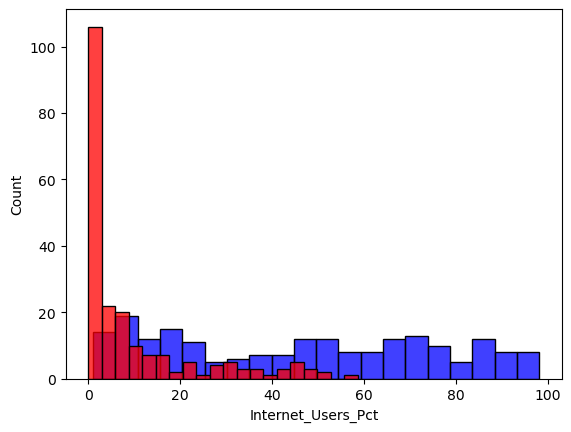

In [57]:
sns.histplot(int_use_2014['Internet_Users_Pct'], bins = 20, color = 'blue')
sns.histplot(int_use_2000['Internet_Users_Pct'], bins = 20, color = 'red')

For how many countries was the percentage of internet users below 5% in 2014?

In [58]:
int_below_5 = int_use_2014[int_use_2014['Internet_Users_Pct'] < 5]
int_below_5.shape

(10, 3)

Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [59]:
gdp_df.shape

(8219, 3)

In [60]:
internet_df.shape

(6084, 3)

In [61]:
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

In [62]:
internet_df.columns

Index(['Country', 'Year', 'Internet_Users_Pct'], dtype='object')

In [63]:
gdp_df['Year'].dtype

dtype('int64')

In [64]:
internet_df['Year'].dtype

dtype('O')

In [65]:
## 'Year' column needs to be converted to the same data type

gdp_df['Year'] = gdp_df['Year'].astype(str)
internet_df['Year'] = internet_df['Year'].astype(str)

In [66]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how = 'outer', on = ['Country', 'Year'])
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2000,1617.826475,NaN
2,Afghanistan,2001,1454.110782,0.004723
3,Afghanistan,2002,1774.308743,0.004561
4,Afghanistan,2003,1815.928200,0.087891


In [67]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9495,Zimbabwe,2020,2987.269823,29.2986
9496,Zimbabwe,2021,3184.785451,32.4616
9497,Zimbabwe,2022,3323.121932,32.5615
9498,Zimbabwe,2023,3442.251327,NaN
9499,footnoteSeqID,Footnote,NaN,NaN


Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [68]:
gdp_and_internet_use = gdp_and_internet_use.sort_values(by = 'Internet_Users_Pct', ascending = False)
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9007,United Arab Emirates,2020,65784.676939,100.0
7409,Saudi Arabia,2022,57351.874387,100.0
593,Bahrain,2021,54954.675790,100.0
7053,Qatar,2022,114740.123615,100.0
7052,Qatar,2021,116832.570290,100.0
...,...,...,...,...
9466,Zimbabwe,1991,4126.405247,NaN
9467,Zimbabwe,1992,3649.891947,NaN
9468,Zimbabwe,1993,3634.750494,NaN
9498,Zimbabwe,2023,3442.251327,NaN


In [69]:
gdp_and_internet_use2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == '2014']
gdp_and_internet_use2014.head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3944,Iceland,2014,57981.199448,98.158
2867,Falkland (Malvinas) Islands,2014,NaN,97.600
824,Bermuda,2014,92298.387811,96.800


In [70]:
### Need to work on Facetgrid

Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [71]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == '2014']
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3944,Iceland,2014,57981.199448,98.1580
2867,Falkland (Malvinas) Islands,2014,NaN,97.6000
824,Bermuda,2014,92298.387811,96.8000
6467,Norway,2014,84753.668395,96.3005
2168,Denmark,2014,60992.212220,95.9935


Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

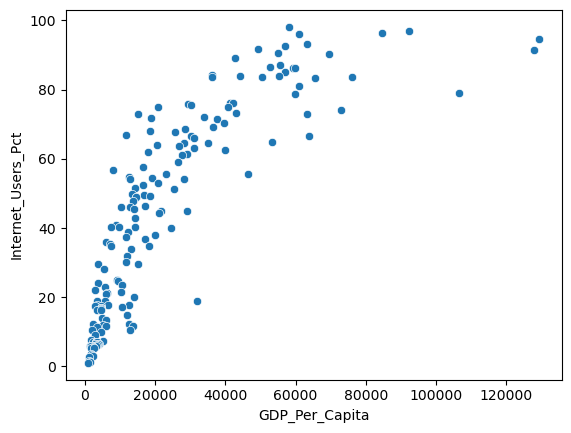

In [76]:
sns.scatterplot(data = gdp_and_internet_use_2014, y = 'Internet_Users_Pct', x = 'GDP_Per_Capita')